# Исследование автомобильных заторов в Сан-Паулу

Указанный датасет демонстрирует исследования автомобильных заторов в Сан-Паулу с 2001 года. Цель предсказать, является ли дорога по которой производится движение автомагистралью или нет в зависимости от геолокации дороги, направления движения, времени и длине затора

## Признаки

* _passage_ - Название дороги
* _direction_ - Направление движения(указывается ближайщий крупный город)
* _type_ - Является ли указанная трасса автомагистралью
* _region_ - Район Сан-Паулу
* _timestamp_ - Время фиксирования затора
* _segment_ - Геолокация дороги (улица или иное описание)

In [61]:
import pandas as pd
import pandas.plotting as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
df=pd.read_feather(r'C:\Users\troit\OneDrive\Рабочий стол\Лобач\sao_paulo-traffic_jams.feather')

In [63]:
print (df)

          index                                   passage  \
0             0  Jânio Quadros, Túnel                       
1             1  Juscelino Kubitschek, Av Pres              
2             2  Jânio Quadros, Túnel                       
3             3  Juscelino Kubitschek, Av Pres              
4             4  Jânio Quadros, Túnel                       
...         ...                                       ...   
5223443  230195  Marginal Pinheiros                         
5223444  230196  Marginal Pinheiros                         
5223445  230197  Marginal Pinheiros                         
5223446  230198  Marginal Pinheiros                         
5223447  230199  Marginal Pinheiros                         

                                        direction type region  \
0        unico//                                   NaN  OESTE   
1        Ibirapuera/Pinheiros                      NaN    SUL   
2        unico//                                   NaN  OESTE   
3      

0           799
1           260
2           799
3           260
4           799
           ... 
5223443    3820
5223444    4640
5223445    3820
5223446    4640
5223447    3820
Name: jam_size, Length: 5223448, dtype: int64


C:\Users\troit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


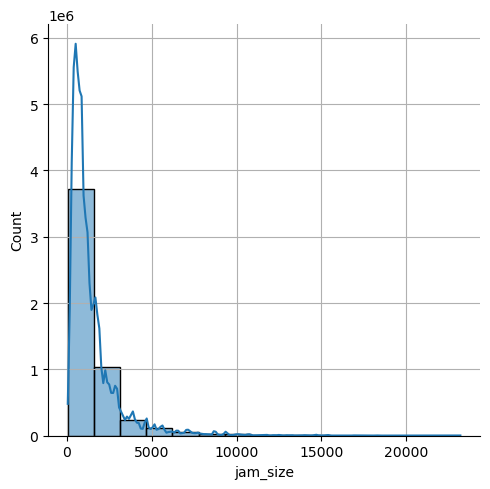

In [64]:
print(df['jam_size'])

sns.displot(df["jam_size"],bins=15,kde=True)
plt.grid()

In [65]:
for i in range(1000):
    print(i/1000,df['jam_size'].quantile(i/1000))

0.0 51.0
0.001 60.0
0.002 70.0
0.003 90.0
0.004 100.0
0.005 100.0
0.006 120.0
0.007 136.0
0.008 150.0
0.009 151.0
0.01 170.0
0.011 172.0
0.012 180.0
0.013 180.0
0.014 180.0
0.015 180.0
0.016 180.0
0.017 180.0
0.018 180.0
0.019 180.0
0.02 180.0
0.021 180.0
0.022 190.0
0.023 200.0
0.024 200.0
0.025 200.0
0.026 200.0
0.027 200.0
0.028 200.0
0.029 210.0
0.03 220.0
0.031 230.0
0.032 240.0
0.033 250.0
0.034 250.0
0.035 250.0
0.036 250.0
0.037 250.0
0.038 260.0
0.039 260.0
0.04 260.0
0.041 260.0
0.042 260.0
0.043 260.0
0.044 260.0
0.045 260.0
0.046 270.0
0.047 271.0
0.048 280.0
0.049 280.0
0.05 280.0
0.051 280.0
0.052 290.0
0.053 290.0
0.054 290.0
0.055 290.0
0.056 299.0
0.057 300.0
0.058 300.0
0.059 300.0
0.06 300.0
0.061 300.0
0.062 300.0
0.063 300.0
0.064 300.0
0.065 300.0
0.066 300.0
0.067 300.0
0.068 300.0
0.069 300.0
0.07 300.0
0.071 300.0
0.072 300.0
0.073 300.0
0.074 300.0
0.075 300.0
0.076 300.0
0.077 300.0
0.078 300.0
0.079 300.0
0.08 300.0
0.081 300.0
0.082 309.0
0.083 310.0
0.084 

In [66]:
print(min(df['jam_size']))

51


In [67]:
print(max(df['jam_size']))

23200


In [68]:
df['direction']

0          unico//                                 
1          Ibirapuera/Pinheiros                    
2          unico//                                 
3          Ibirapuera/Pinheiros                    
4          unico//                                 
                             ...                   
5223443    Interlagos/Castelo                      
5223444    Interlagos/Castelo                      
5223445    Interlagos/Castelo                      
5223446    Interlagos/Castelo                      
5223447    Interlagos/Castelo                      
Name: direction, Length: 5223448, dtype: category
Categories (103, object): ['//unico                                 ', 'A Alvim/S Miguel                        ', 'A Senna/Maua                            ', 'A.Senna/Castelo Branco                  ', ..., 'Vila Prudente/Sapopem.                  ', 'Vl Matilde/Penha                        ', 'unico//                                 ', 'único//                              

In [69]:
df['type']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
5223443      A
5223444      E
5223445      A
5223446      E
5223447      A
Name: type, Length: 5223448, dtype: category
Categories (2, object): ['A', 'E']

In [70]:
df['segment']

0               De OSCAR AMERICANO até  JUSCELINO KUBITSCHEK
1          De  Emboque Túnel Jânio Quadros até 290 m depo...
2               De OSCAR AMERICANO até  JUSCELINO KUBITSCHEK
3          De  Emboque Túnel Jânio Quadros até 290 m depo...
4               De OSCAR AMERICANO até  JUSCELINO KUBITSCHEK
                                 ...                        
5223443    De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223444    De CIDADE UNIVERSITARIA até 700 m depois de QU...
5223445    De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223446    De CIDADE UNIVERSITARIA até 700 m depois de QU...
5223447    De CIDADE UNIVERSITARIA até 350 m depois de JU...
Name: segment, Length: 5223448, dtype: category
Categories (113996, object): ['De  ANTONIO BARBOSA DA S. SANDOVAL até  AUTOD..., 'De  ANTONIO BARBOSA DA S. SANDOVAL até  BATIS..., 'De  ANTONIO BARBOSA DA S. SANDOVAL até  BENED..., 'De  ANTONIO BARBOSA DA S. SANDOVAL até  ENZO ..., ..., 'De ZILDA até 430 m depois de MARGINAL DO 

In [71]:
df.describe()

,index,timestamp,jam_size
count,5.223448e+06,5223448,5.223448e+06
mean,1.488282e+05,2010-05-10 19:31:43.576067584,1.453529e+03
min,0.000000e+00,2001-01-02 07:30:00,5.100000e+01
25%,7.254700e+04,2006-05-05 09:00:00,5.600000e+02
50%,1.450950e+05,2010-04-25 16:45:00,9.500000e+02
75%,2.191080e+05,2014-08-06 08:00:00,1.710000e+03
max,3.610900e+05,2018-09-30 19:30:00,2.320000e+04
std,8.962550e+04,NaN,1.589444e+03


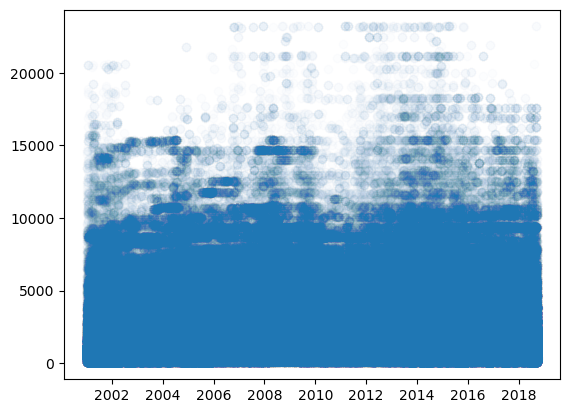

In [72]:
plt.scatter(df['timestamp'], df['jam_size'], alpha=0.01)

После построения диаграммы рассеивания видно, что работать с признаком timestamp некорректно. Попробуем исправить ситуацию разделив этот признак отдельно на день недели и время в минутах.

In [73]:
minuts=[]
for i in range(len(df['timestamp'])):
    minuts.append(60*df['timestamp'][i].hour+df['timestamp'][i].minute)

In [74]:
df['minuts']=minuts

In [75]:
df.describe()

,index,timestamp,jam_size,minuts
count,5.223448e+06,5223448,5.223448e+06,5.223448e+06
mean,1.488282e+05,2010-05-10 19:31:43.576067584,1.453529e+03,8.607910e+02
min,0.000000e+00,2001-01-02 07:30:00,5.100000e+01,0.000000e+00
25%,7.254700e+04,2006-05-05 09:00:00,5.600000e+02,6.000000e+02
50%,1.450950e+05,2010-04-25 16:45:00,9.500000e+02,9.000000e+02
75%,2.191080e+05,2014-08-06 08:00:00,1.710000e+03,1.110000e+03
max,3.610900e+05,2018-09-30 19:30:00,2.320000e+04,1.410000e+03
std,8.962550e+04,NaN,1.589444e+03,2.617559e+02


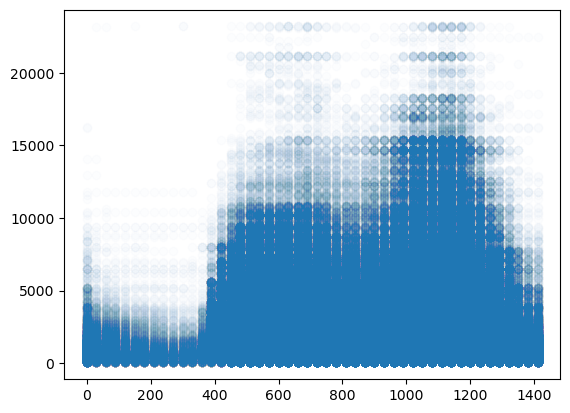

In [76]:
plt.scatter(df['minuts'], df['jam_size'], alpha=0.01)

In [77]:
weekday=[]
for i in range(len(df['timestamp'])):
    weekday.append(df['timestamp'][i].weekday())

In [78]:
df['weekday']=weekday

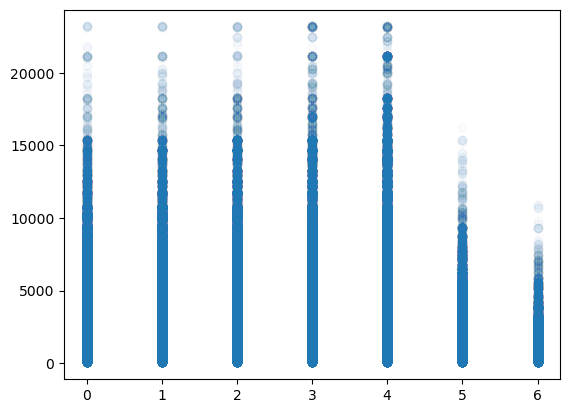

In [79]:
plt.scatter(df['weekday'], df['jam_size'], alpha=0.01)

Видно, что теперь данные более корректные. Мы построили зависимость длины автомобильных пробок от времени и дня недели, что считается наиболее явными характеристиками автомобильного движения.

Исходя из полученных результатов можем заключить, что интенсивное движение в Сан-Паулу происходит в дневное время, причём вечером в районе 19:00 значение в среднем достигает своего пика. Также можно отметить, что длина затора в будние дни в среднем больше

In [80]:
df.describe()

,index,timestamp,jam_size,minuts,weekday
count,5.223448e+06,5223448,5.223448e+06,5.223448e+06,5.223448e+06
mean,1.488282e+05,2010-05-10 19:31:43.576067584,1.453529e+03,8.607910e+02,2.255474e+00
min,0.000000e+00,2001-01-02 07:30:00,5.100000e+01,0.000000e+00,0.000000e+00
25%,7.254700e+04,2006-05-05 09:00:00,5.600000e+02,6.000000e+02,1.000000e+00
50%,1.450950e+05,2010-04-25 16:45:00,9.500000e+02,9.000000e+02,2.000000e+00
75%,2.191080e+05,2014-08-06 08:00:00,1.710000e+03,1.110000e+03,4.000000e+00
max,3.610900e+05,2018-09-30 19:30:00,2.320000e+04,1.410000e+03,6.000000e+00
std,8.962550e+04,NaN,1.589444e+03,2.617559e+02,1.495002e+00


In [81]:
df['type']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
5223443      A
5223444      E
5223445      A
5223446      E
5223447      A
Name: type, Length: 5223448, dtype: category
Categories (2, object): ['A', 'E']

In [82]:
year_time=[]
for i in range(len(df['timestamp'])):
    if df['timestamp'][i].month<3 or df['timestamp'][i].month==12:
        year_time.append(1)
    elif (df['timestamp'][i].month>2) and (df['timestamp'][i].month<6):
        year_time.append(2)
    elif (df['timestamp'][i].month>5) and (df['timestamp'][i].month<9):
        year_time.append(3)
    else:
        year_time.append(4)

In [83]:
df['time_of_year']=year_time

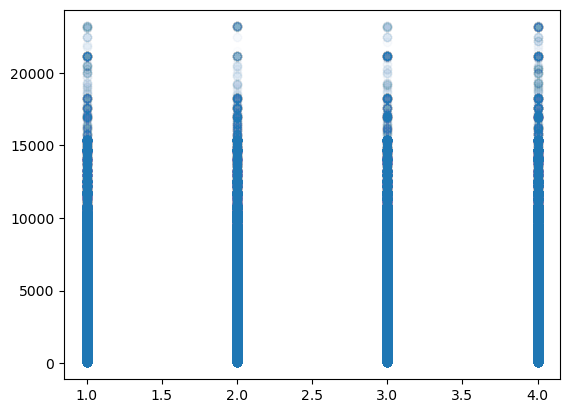

In [84]:
plt.scatter(df['time_of_year'], df['jam_size'], alpha=0.01)

In [85]:
df

,index,passage,direction,type,region,timestamp,jam_size,segment,minuts,weekday,time_of_year
0,0,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,870,6,1
1,1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,SUL,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,870,6,1
2,2,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,900,6,1
3,3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,SUL,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,900,6,1
4,4,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,930,6,1
...,...,...,...,...,...,...,...,...,...,...,...
5223443,230195,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,1110,6,4
5223444,230196,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,1140,6,4
5223445,230197,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,1140,6,4
5223446,230198,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,1170,6,4


In [86]:
print(df['type'].unique())

[NaN, 'E', 'A']
Categories (2, object): ['A', 'E']


C:\Users\troit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='type', ylabel='count'>

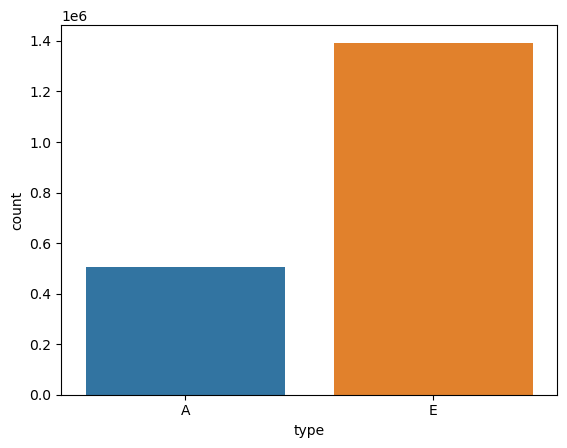

In [87]:
sns.countplot(x='type', data=df)

In [88]:
rows_to_drop=df[(df["jam_size"]>df["jam_size"].quantile(0.995))].index

In [89]:
df=df.drop(rows_to_drop)

C:\Users\troit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='region', ylabel='jam_size'>

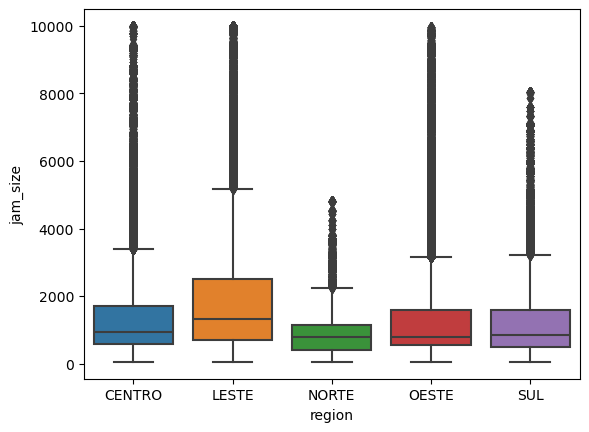

In [90]:
sns.boxplot(x="region", y="jam_size", data=df)

In [91]:
df['region'].nunique()

5

In [92]:
df['passage'].nunique()

276

In [93]:
df.loc[df['region']=='LESTE'].count()

index           401305
passage         401305
direction       401305
type            236178
region          401305
timestamp       401305
jam_size        401305
segment         401305
minuts          401305
weekday         401305
time_of_year    401305
dtype: int64

## Работаем с пропущенными значениями

In [94]:
df.isna().sum()

index                 0
passage               0
direction             0
type            3322482
region          2496864
timestamp             0
jam_size              0
segment               0
minuts                0
weekday               0
time_of_year          0
dtype: int64

In [95]:
df.shape

(5197765, 11)

Видно, что пропущенные значения присутствуют в двух признаках и их довольно много. Поскольку данных очень много, мы можем позволить удалить все колонки с пропущенными значениями

In [96]:
data1=df.dropna()

In [97]:
data1.shape

(578666, 11)

In [98]:
data1.isna().sum()

index           0
passage         0
direction       0
type            0
region          0
timestamp       0
jam_size        0
segment         0
minuts          0
weekday         0
time_of_year    0
dtype: int64

In [99]:
data1.describe()

,index,timestamp,jam_size,minuts,weekday,time_of_year
count,578666.000000,578666,578666.000000,578666.000000,578666.000000,578666.000000
mean,153328.266219,2014-07-31 02:31:57.387923200,2141.031118,825.879730,2.263255,2.544592
min,0.000000,2010-01-02 18:00:00,51.000000,0.000000,0.000000,1.000000
25%,75124.000000,2012-06-15 07:00:00,785.000000,600.000000,1.000000,2.000000
50%,152126.500000,2014-09-10 08:00:00,1500.000000,810.000000,2.000000,3.000000
75%,226442.750000,2016-11-07 17:00:00,2820.000000,1080.000000,4.000000,4.000000
max,361090.000000,2018-09-30 19:30:00,10000.000000,1410.000000,6.000000,4.000000
std,91586.098900,NaN,1908.528484,266.138545,1.537052,1.090444


Также посмотрим на признак _timestamp_. Мы вычленили из него нужные нам данные. Теперь можем смело его удалить

In [100]:
data1 = data1.drop(['timestamp'], axis=1)

In [101]:
data1

,index,passage,direction,type,region,jam_size,segment,minuts,weekday,time_of_year
8,8,Marginal Tietê,A.Senna/Castelo Branco,E,LESTE,4109,De 791 m antes de TATUAPE até IMIGRANTE NORDE...,420,0,1
10,10,Marginal Tietê,A.Senna/Castelo Branco,A,LESTE,2137,De 763 m antes de TATUAPE até ARICANDUVA,420,0,1
14,14,Marginal Tietê,A.Senna/Castelo Branco,E,LESTE,4168,De 732 m antes de TATUAPE até IMIGRANTE NORDE...,450,0,1
17,17,Marginal Tietê,A.Senna/Castelo Branco,A,LESTE,2192,De 708 m antes de TATUAPE até ARICANDUVA,450,0,1
18,18,Radial Leste - DEC MO,Bairro/Centro,E,CENTRO,800,De ALVARO RAMOS Metro Belem até PIRES DO RIO ...,450,0,1
...,...,...,...,...,...,...,...,...,...,...
5223443,230195,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,1110,6,4
5223444,230196,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,1140,6,4
5223445,230197,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,1140,6,4
5223446,230198,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,1170,6,4


<Axes: xlabel='region', ylabel='jam_size'>

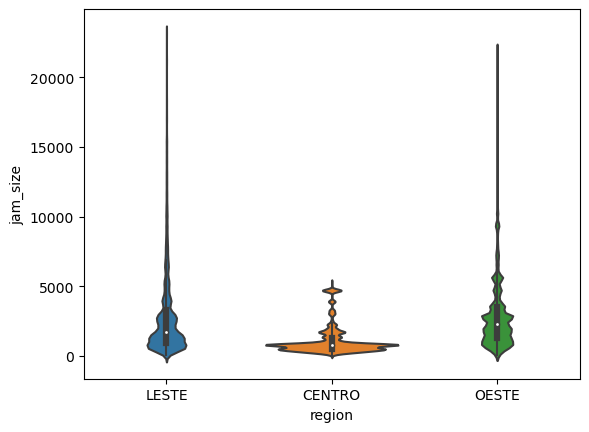

In [159]:
sns.violinplot(x="region", y="jam_size", data=data1)

In [103]:
data1.describe()

,index,jam_size,minuts,weekday,time_of_year
count,578666.000000,578666.000000,578666.000000,578666.000000,578666.000000
mean,153328.266219,2141.031118,825.879730,2.263255,2.544592
std,91586.098900,1908.528484,266.138545,1.537052,1.090444
min,0.000000,51.000000,0.000000,0.000000,1.000000
25%,75124.000000,785.000000,600.000000,1.000000,2.000000
50%,152126.500000,1500.000000,810.000000,2.000000,3.000000
75%,226442.750000,2820.000000,1080.000000,4.000000,4.000000
max,361090.000000,10000.000000,1410.000000,6.000000,4.000000


In [104]:
numeric_df = data1.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                 index  jam_size    minuts   weekday  time_of_year
index         1.000000 -0.005200  0.023498  0.007525      0.565379
jam_size     -0.005200  1.000000  0.078828  0.003680     -0.003321
minuts        0.023498  0.078828  1.000000  0.058433     -0.000902
weekday       0.007525  0.003680  0.058433  1.000000     -0.008182
time_of_year  0.565379 -0.003321 -0.000902 -0.008182      1.000000


<Axes: >

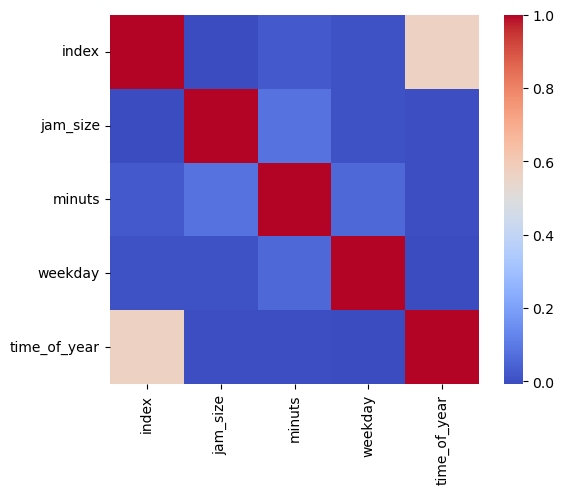

In [105]:
sns.heatmap(correlation_matrix, square=True, cmap='coolwarm')

## Проведём  бинаризацию и векторизацию

In [106]:
 1-pd.factorize(data1['type'])[0]

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [107]:
data1['type']= 1-pd.factorize(data1['type'])[0]

In [108]:
data1['type'].unique()

array([1, 0], dtype=int64)

In [109]:
data1.to_csv('out.csv', index=False)

In [158]:
data1=pd.read_csv(r'C:\Users\troit\Downloads\out.csv')

In [111]:
data1

,index,passage,direction,type,region,jam_size,segment,minuts,weekday,time_of_year
0,8,Marginal Tietê,A.Senna/Castelo Branco,1,LESTE,4109,De 791 m antes de TATUAPE até IMIGRANTE NORDE...,420,0,1
1,10,Marginal Tietê,A.Senna/Castelo Branco,0,LESTE,2137,De 763 m antes de TATUAPE até ARICANDUVA,420,0,1
2,14,Marginal Tietê,A.Senna/Castelo Branco,1,LESTE,4168,De 732 m antes de TATUAPE até IMIGRANTE NORDE...,450,0,1
3,17,Marginal Tietê,A.Senna/Castelo Branco,0,LESTE,2192,De 708 m antes de TATUAPE até ARICANDUVA,450,0,1
4,18,Radial Leste - DEC MO,Bairro/Centro,1,CENTRO,800,De ALVARO RAMOS Metro Belem até PIRES DO RIO ...,450,0,1
...,...,...,...,...,...,...,...,...,...,...
590614,230195,Marginal Pinheiros,Interlagos/Castelo,0,OESTE,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,1110,6,4
590615,230196,Marginal Pinheiros,Interlagos/Castelo,1,OESTE,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,1140,6,4
590616,230197,Marginal Pinheiros,Interlagos/Castelo,0,OESTE,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,1140,6,4
590617,230198,Marginal Pinheiros,Interlagos/Castelo,1,OESTE,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,1170,6,4


In [112]:
data1['passage'].nunique()

10

In [113]:
Region_dummies = pd.get_dummies(data1['region'])

In [114]:
Region_dummies.head()

,CENTRO,LESTE,OESTE
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,True,False,False


In [115]:
data1 = pd.concat((data1, Region_dummies), axis=1)
data1 = data1.drop(['region'], axis=1)

In [116]:
data1

,index,passage,direction,type,jam_size,segment,minuts,weekday,time_of_year,CENTRO,LESTE,OESTE
0,8,Marginal Tietê,A.Senna/Castelo Branco,1,4109,De 791 m antes de TATUAPE até IMIGRANTE NORDE...,420,0,1,False,True,False
1,10,Marginal Tietê,A.Senna/Castelo Branco,0,2137,De 763 m antes de TATUAPE até ARICANDUVA,420,0,1,False,True,False
2,14,Marginal Tietê,A.Senna/Castelo Branco,1,4168,De 732 m antes de TATUAPE até IMIGRANTE NORDE...,450,0,1,False,True,False
3,17,Marginal Tietê,A.Senna/Castelo Branco,0,2192,De 708 m antes de TATUAPE até ARICANDUVA,450,0,1,False,True,False
4,18,Radial Leste - DEC MO,Bairro/Centro,1,800,De ALVARO RAMOS Metro Belem até PIRES DO RIO ...,450,0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
590614,230195,Marginal Pinheiros,Interlagos/Castelo,0,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,1110,6,4,False,False,True
590615,230196,Marginal Pinheiros,Interlagos/Castelo,1,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,1140,6,4,False,False,True
590616,230197,Marginal Pinheiros,Interlagos/Castelo,0,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,1140,6,4,False,False,True
590617,230198,Marginal Pinheiros,Interlagos/Castelo,1,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,1170,6,4,False,False,True


In [117]:
data1['segment'].nunique()

23810

 У данного признака слишком много уникальных значений. Во избежание проблем с памятью и временем работы алгоритмов удалим его из датасета

In [118]:
data1 = data1.drop(['segment'], axis=1)

In [119]:
data1['passage'].nunique()

10

In [120]:
Passage_dummies = pd.get_dummies(data1['passage'])

In [121]:
Passage_dummies.head()

,"Estado, Av do - DEC VILA PRUDENTE","Luis, Av. São",Marginal Pinheiros,Marginal Tietê,Maria Paula/Vd Jacareí/Vd 9 de Julho,"Mercúrio, Av","Queiroz, Av. Sen.",Radial Leste - DEC MO,"Salim Farah Maluf, Av/Tatuapé, Pte","Sapetuba, R"
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False


In [122]:
data1 = pd.concat((data1, Passage_dummies), axis=1)
data1 = data1.drop(['passage'], axis=1)

In [123]:
data1['direction'].head(100)

0     A.Senna/Castelo Branco                  
1     A.Senna/Castelo Branco                  
2     A.Senna/Castelo Branco                  
3     A.Senna/Castelo Branco                  
4     Bairro/Centro                           
                        ...                   
95    Interlagos/Castelo                      
96    Bairro/Centro                           
97    Bairro/Centro                           
98    Interlagos/Castelo                      
99    Interlagos/Castelo                      
Name: direction, Length: 100, dtype: object

In [124]:

data1 = data1.drop(['index'], axis=1)

In [125]:
Direction_dummies = pd.get_dummies(data1['direction'])
data1 = data1.drop(['direction'], axis=1)

In [126]:
data1

,type,jam_size,minuts,weekday,time_of_year,CENTRO,LESTE,OESTE,"Estado, Av do - DEC VILA PRUDENTE","Luis, Av. São",Marginal Pinheiros,Marginal Tietê,Maria Paula/Vd Jacareí/Vd 9 de Julho,"Mercúrio, Av","Queiroz, Av. Sen.",Radial Leste - DEC MO,"Salim Farah Maluf, Av/Tatuapé, Pte","Sapetuba, R"
0,1,4109,420,0,1,False,True,False,False,False,False,True,False,False,False,False,False,False
1,0,2137,420,0,1,False,True,False,False,False,False,True,False,False,False,False,False,False
2,1,4168,450,0,1,False,True,False,False,False,False,True,False,False,False,False,False,False
3,0,2192,450,0,1,False,True,False,False,False,False,True,False,False,False,False,False,False
4,1,800,450,0,1,True,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590614,0,3820,1110,6,4,False,False,True,False,False,True,False,False,False,False,False,False,False
590615,1,4640,1140,6,4,False,False,True,False,False,True,False,False,False,False,False,False,False
590616,0,3820,1140,6,4,False,False,True,False,False,True,False,False,False,False,False,False,False
590617,1,4640,1170,6,4,False,False,True,False,False,True,False,False,False,False,False,False,False


In [127]:
Direction_dummies.head()

,//unico,A.Senna/Castelo Branco,Bairro/Centro,Castelo/A.Senna,Castelo/Interlagos,Centro/Bairro,Interlagos/Castelo,Ipiranga/Santana,Marginal/Vila Prudente,Santana/Ipiranga,Vila Prudente/Marginal,único//
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False


In [128]:
data1 = pd.concat((data1, Direction_dummies), axis=1)


In [129]:
data1

,type,jam_size,minuts,weekday,time_of_year,CENTRO,LESTE,OESTE,"Estado, Av do - DEC VILA PRUDENTE","Luis, Av. São",...,Bairro/Centro,Castelo/A.Senna,Castelo/Interlagos,Centro/Bairro,Interlagos/Castelo,Ipiranga/Santana,Marginal/Vila Prudente,Santana/Ipiranga,Vila Prudente/Marginal,único//
0,1,4109,420,0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,2137,420,0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,4168,450,0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,2192,450,0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,800,450,0,1,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590614,0,3820,1110,6,4,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
590615,1,4640,1140,6,4,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
590616,0,3820,1140,6,4,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
590617,1,4640,1170,6,4,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


## Проведём нормализацию

In [130]:
data1_stand = (data1 - data1.mean(axis = 0))/data1.std(axis = 0)

In [131]:
data1_stand.describe()

,type,jam_size,minuts,weekday,time_of_year,CENTRO,LESTE,OESTE,"Estado, Av do - DEC VILA PRUDENTE","Luis, Av. São",...,Bairro/Centro,Castelo/A.Senna,Castelo/Interlagos,Centro/Bairro,Interlagos/Castelo,Ipiranga/Santana,Marginal/Vila Prudente,Santana/Ipiranga,Vila Prudente/Marginal,único//
count,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,...,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05,5.906190e+05
mean,1.458094e-17,6.282314e-17,-6.275096e-17,5.851623e-17,-1.162625e-16,-2.868065e-17,-6.034486e-17,5.724100e-17,-4.427215e-18,-1.031012e-17,...,-1.109210e-17,-9.018044e-17,-3.909905e-18,-6.153588e-17,3.618767e-17,1.715546e-17,-5.726506e-18,1.554337e-17,-1.347413e-17,-1.809384e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.249503e+00,-9.342608e-01,-3.116099e+00,-1.479772e+00,-1.417350e+00,-5.826761e-01,-8.427413e-01,-7.038142e-01,-2.105303e-01,-6.298776e-02,...,-2.915621e-01,-4.370674e-01,-4.105395e-01,-2.017100e-01,-4.600463e-01,-1.482170e-01,-2.685402e-01,-1.462665e-01,-1.605919e-01,-2.845267e-01
25%,-1.249503e+00,-6.355893e-01,-8.610667e-01,-8.285082e-01,-5.006603e-01,-5.826761e-01,-8.427413e-01,-7.038142e-01,-2.105303e-01,-6.298776e-02,...,-2.915621e-01,-4.370674e-01,-4.105395e-01,-2.017100e-01,-4.600463e-01,-1.482170e-01,-2.685402e-01,-1.462665e-01,-1.605919e-01,-2.845267e-01
50%,8.003168e-01,-3.243890e-01,-7.180553e-02,-1.772447e-01,4.160298e-01,-5.826761e-01,-8.427413e-01,-7.038142e-01,-2.105303e-01,-6.298776e-02,...,-2.915621e-01,-4.370674e-01,-4.105395e-01,-2.017100e-01,-4.600463e-01,-1.482170e-01,-2.685402e-01,-1.462665e-01,-1.605919e-01,-2.845267e-01
75%,8.003168e-01,2.171804e-01,9.429589e-01,1.125282e+00,1.332720e+00,1.716216e+00,1.186602e+00,1.420827e+00,-2.105303e-01,-6.298776e-02,...,-2.915621e-01,-4.370674e-01,-4.105395e-01,-2.017100e-01,-4.600463e-01,-1.482170e-01,-2.685402e-01,-1.462665e-01,-1.605919e-01,-2.845267e-01
max,8.003168e-01,8.421552e+00,2.183226e+00,2.427809e+00,1.332720e+00,1.716216e+00,1.186602e+00,1.420827e+00,4.749903e+00,1.587607e+01,...,3.429796e+00,2.287973e+00,2.435815e+00,4.957605e+00,2.173691e+00,6.746852e+00,3.723831e+00,6.836822e+00,6.226952e+00,3.514603e+00


## Разобъём выборку на обучающую и тестовую

In [132]:
X = data1_stand.drop('type', axis=1)

In [133]:
y = data1['type']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(442964, 147655)

## Прогоняем данные по алгоритмам

### Метод k ближайших соседей

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors =  best_n_neighbors)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

0.2924571844765681 20


KNeighborsClassifier(n_neighbors=20)

In [136]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train  != y_train_predict)
err_test, err_train

(0.2902238325827097, 0.2525555124118439)

In [137]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[39309 18372]
 [24481 65493]]


### Random forest

In [138]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.10608537036869814 0.2596254783109275


### Логистическая регрессия

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, model.predict(X_test)))
print("Матрица рассогласования на обучающей выборке")
print(confusion_matrix(y_train, model.predict(X_train)))
print("Матрица рассогласования на тестовой выборке")
print(confusion_matrix(y_test, model.predict(X_test)))

0.6564235468345058
0.6581558362398835
Матрица рассогласования на обучающей выборке
[[102351  70565]
 [ 81627 188421]]
Матрица рассогласования на тестовой выборке
[[34282 23399]
 [27076 62898]]


### MLP

In [148]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=100)